# Tratamiento de imágenes - Trabajos prácticos
# Práctico 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave

# FORMAS DE VER LAS GRAFICAS --------------------
# ELEGIR UNA DE LAS OPCIONES Y DES-COMENTAR (sacar # de la linea)
# ----------------
# a) graficas en línea  entre las celdas (no interactivo)
%matplotlib inline
# ---------------- 
# b) graficas en línea  entre las celdas (interactivo)
#%matplotlib notebook
# ----------------
# c) graficas en ventanas externas (abre una ventana por cada figura)
# %matplotlib
# ----------------
# d) Si se usa "jupyter lab" en lugar de "jupyter notebook" usar %matplotlib widget en lugar de %matplotlib notebook 
# requiere instalar el modulo "ipympl". Ver https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab#56416229
# %matplotlib widget
#---------------------------------------------------

## Visualización

Imágenes sugeridas: cono.png, oclusion.bmp, lena.bmp
 
a) Levantar una imagen monocromática y mostrarla como imagen en niveles de gris y como una superficie.
- Comparar con _Plugins-->3D Viewer_ de Fiji. Fijar opción de **Display as Surface 2D**

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [3]:
gray_cone = cv2.imread('imagenes/cono.png', cv2.IMREAD_GRAYSCALE)
gray_colony = cv2.imread('imagenes/Cell_Colony.tif', cv2.IMREAD_GRAYSCALE)

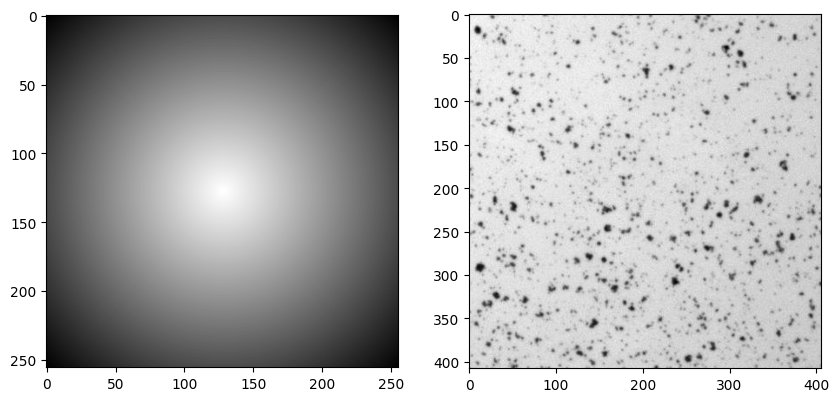

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray_cone, cmap='gray')
ax[1].imshow(gray_colony, cmap='gray')


In [5]:
def plot_as_surface(img):
    """Plots the image as a surface"""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
    ax.plot_surface(X, Y, img, cmap='gray', linewidth=0)
    plt.show()

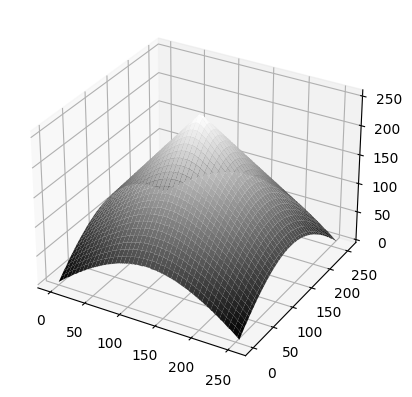

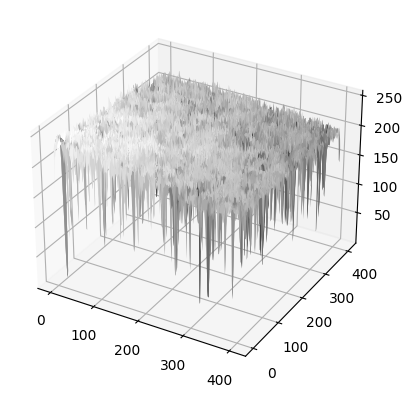

In [6]:
plot_as_surface(gray_cone)
plot_as_surface(gray_colony)

b) Dada una fila de la imagen mostrar el perfil de la misma (plot 1D). Idem para una columna.
- Comparar con _Plot Profile_ en Fiji:
    1. Trazar una linea sobre la imagen
    2. _Ctl+K_ o _Analyze --> Plot Profile_

In [11]:
def plot_profiles(img, row, col):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(img, cmap='gray')
    ax[0].axhline(y=col, color='r', linestyle='dashed')
    ax[0].axvline(x=row, color='b', linestyle='dashed')

    ax[1].plot(img[:,col], c='r')
    ax[2].plot(img[:,row], c='b')

    plt.show()

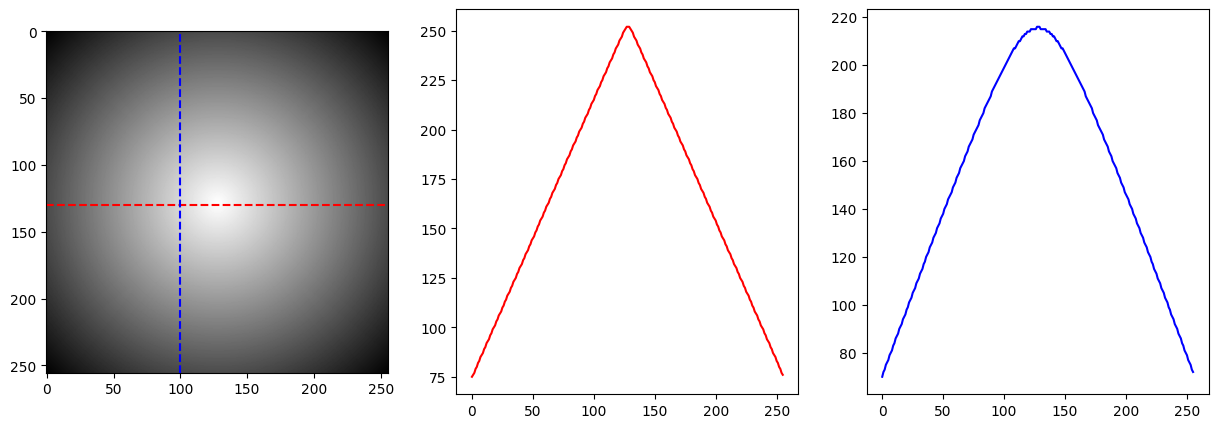

In [12]:
plot_profiles(gray_cone, 100, 130)

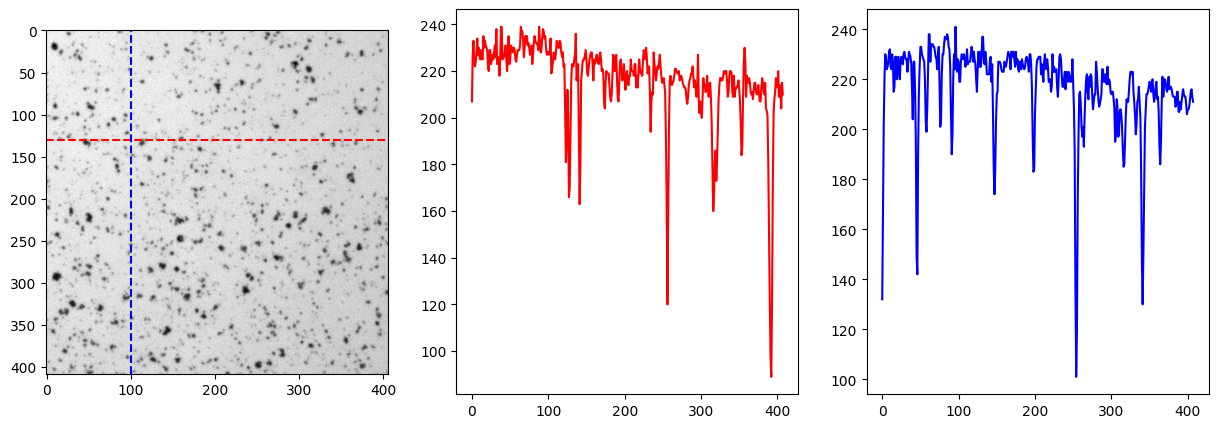

In [13]:
plot_profiles(gray_colony, 100, 130)

c) Mostrar las líneas de nivel de una imagen. Para ello implementar el algoritmo Marching Squares, ver por ejemplo:  
https://en.wikipedia.org/wiki/Marching_squares.   



#### intento con marching squares

In [ ]:
def get_cell_index(cell):
    index = 0
    # Walk around the cell in a clockwise direction and compose the 4-bit binary index
    if cell[0, 0]:
        index |= 8  # Set the most significant bit to 1
    if cell[0, 1]:
        index |= 4
    if cell[1, 1]:
        index |= 2
    if cell[1, 0]:
        index |= 1  # Set the least significant bit to 1
    return index

def get_contour_segments(index):
    # Define lookup table of contour segments
    segments = [        [],
        [(0.5, 0.0), (1.0, 0.5), (0.5, 1.0)],
        [(1.0, 0.5), (0.5, 1.0), (0.0, 0.5)],
        [(0.5, 1.0), (0.0, 0.5), (0.5, 0.0)],
        [(0.0, 0.5), (0.5, 0.0)],
        [(0.5, 0.0), (1.0, 0.5)],
        [(1.0, 0.5), (0.5, 1.0)],
        [(0.5, 1.0), (0.0, 0.5)],
        [(0.0, 0.5), (0.5, 0.0), (0.5, 1.0)],
        [(0.5, 0.0), (1.0, 0.5), (0.5, 1.0)],
        [(1.0, 0.5), (0.5, 1.0), (0.0, 0.5)],
        [(0.5, 1.0), (0.0, 0.5), (0.5, 0.0)],
        [(0.0, 0.5), (0.5, 0.0), (1.0, 0.5)],
        [(0.5, 0.0), (0.5, 1.0), (1.0, 0.5)],
        [(0.5, 1.0), (0.0, 0.5), (1.0, 0.5)],
        [(0.0, 0.5), (0.5, 0.0), (0.5, 1.0)]
    ]
    # Check each segment to ensure it has two endpoints
    for i in range(len(segments)):
        if len(segments[i]) == 1:
            segments[i].append(segments[i][0])
    return segments[index]

def interpolate(segment, threshold):
    # Compute linear interpolation between endpoints of segment
    p0, p1 = segment
    print(f"{segment}, {p0}, {p1}")
    alpha = (threshold - p0[0]) / (p1[0] - p0[0])
    x = p0[1] * (1 - alpha) + p1[1] * alpha
    y = threshold
    return x, y

def marching_squares(binary_arr, cell_size=1, threshold=0.5):
    # Compute number of cells in x and y directions
    ny, nx = binary_arr.shape
    nx_cells = int(np.ceil(nx / cell_size))
    ny_cells = int(np.ceil(ny / cell_size))

    # Create empty list to store contour vertices
    vertices = []

    # Loop over cells in y and x directions
    for j in range(ny_cells):
        for i in range(nx_cells):
            # Extract binary cell from binary array
            y0 = j * cell_size
            y1 = min((j + 1) * cell_size, ny)
            x0 = i * cell_size
            x1 = min((i + 1) * cell_size, nx)
            cell = binary_arr[y0:y1, x0:x1]

            # Lookup contour segments for binary index
            segments = get_contour_segments(get_cell_index(cell))

            # Interpolate contour vertices along each segment
            for segment in segments:
                vertices.append(interpolate(segment, threshold))

                # Shift contour vertex to correct position in global coordinate system
                x = x0 + vertices[-1][0] * (x1 - x0)
                y = y0 + vertices[-1][1] * (y1 - y0)
                vertices[-1] = (x, y)

    return vertices


def level_lines(I, lvl):
    """Returns the image with the level lines for the given level"""
    binary = np.where(I > lvl, 1, 0)
    ny, nx = binary.shape

    vertices = marching_squares(binary, cell_size=4, threshold=0.5)

    # Plot binary image and contour
    fig, ax = plt.subplots()
    ax.imshow(binary, cmap='gray', extent=[0, nx, ny, 0])
    ax.plot([x for x, y in vertices], [y for x, y in vertices], color='red', linewidth=2)
    plt.show()

level_lines(gray_colony, 10)
    

In [9]:
from skimage import measure

In [10]:
def lineasDeNivel(I, niveles=[10, 50, 100, 150, 200, 250]):
    # IMPLEMENTAR

    # measure.find_contours utiliza el algoritmo de Marching Squares
    level_contours = [measure.find_contours(I, nivel) for nivel in niveles]
    
    fig, ax = plt.subplots()
    ax.imshow(I, cmap=plt.cm.gray)

    for contours in level_contours:
        for contour in contours:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=1)

    ax.axis('image')

    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

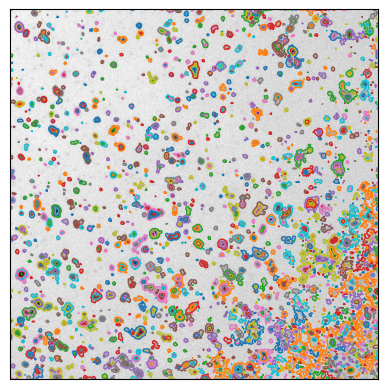

In [11]:
lineasDeNivel(gray_colony)

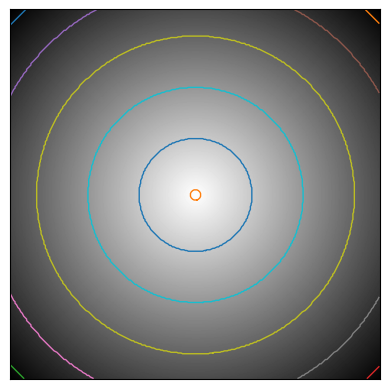

In [12]:
lineasDeNivel(gray_cone)

e) Ver qué características tienen las líneas de nivel (curvas abiertas o cerradas, relación con los bordes de la imagen, relación con oclusiones).  
Comparar resultados con la [función contour ](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html)

Son curvas cerradas que generalmente coinciden con los bordes existentes en la imagen (contornos de formas).

Los resultados son similares pues la funcion contour tambien utiliza el algoritmo de Marching Squares.

In [13]:
def using_contour(img):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap=plt.cm.gray)
    ax.contour(img, levels=[10, 50, 100, 150, 200, 250], cmap=plt.cm.jet)
    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

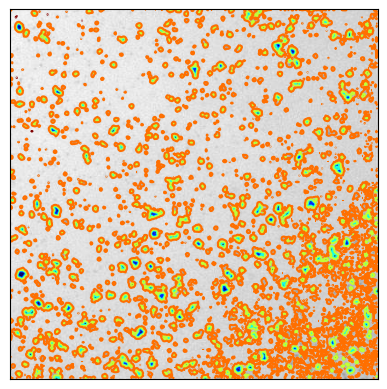

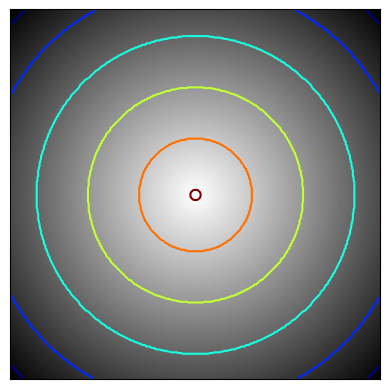

In [14]:
using_contour(gray_colony)
using_contour(gray_cone)

## Histograma

a) Calcular y desplegar el histograma y el histograma acumulado de una imagen.
- Comparar con el histograma de la misma imagen en Fiji: _Analyze-->Histogram_ o _Ctrl+H_

In [5]:
def n_plots(n, titles=["grafico1", "grafico2"]):
    """ Decorador que hace dos gráficos """
    def wrapper(func):
        def inner(*args, **kwargs):
            rows = n/2 if n%2 == 0 else (n+1)/2
            fig, ax = plt.subplots(int(rows), 2, figsize=(10, 5))
            values = func(*args, **kwargs)
            for ax, title, val in zip(ax, titles, values):
                ax.set_title(title)
                ax.plot(val)
        return inner
    return wrapper

In [6]:
@n_plots(n=2, titles=["Histograma", "Histograma Acumulado"])
def histograma(I, nBins=256):
    # IMPLEMENTAR
    histograma = np.zeros(nBins)
    
    rows, cols = I.shape[0], I.shape[1]
    for i in range(rows):
        for j in range(cols):
            histograma[I[i,j]] += 1
            histogramaAcumulado = np.cumsum(histograma)
    
    return histograma, histogramaAcumulado

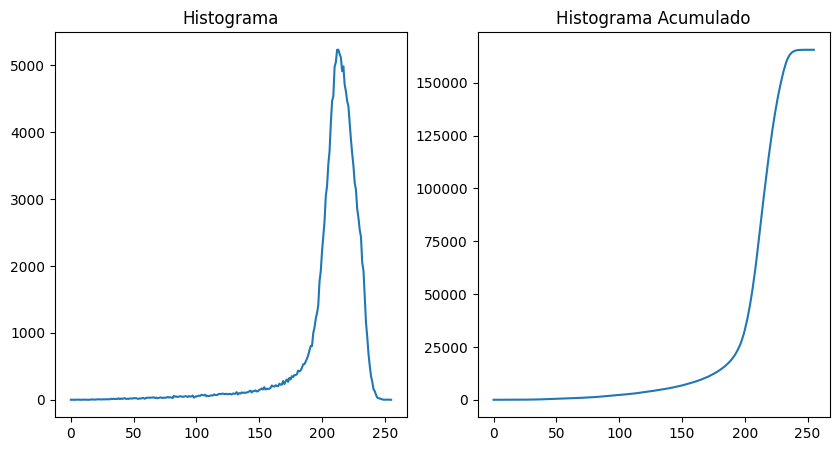

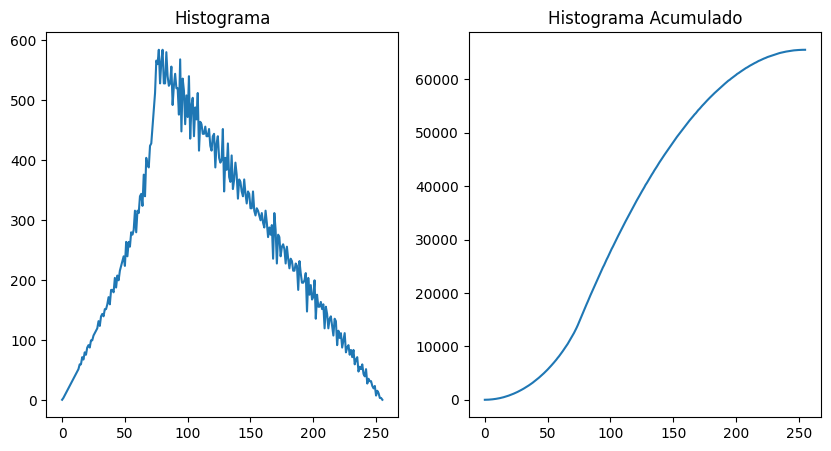

In [17]:
histograma(gray_colony)
histograma(gray_cone)

In [18]:
@n_plots(n=2, titles=["Histograma", "Histograma Acumulado"])
def histogramas_con_libreria(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cumulative_hist = np.cumsum(hist)
    return hist, cumulative_hist

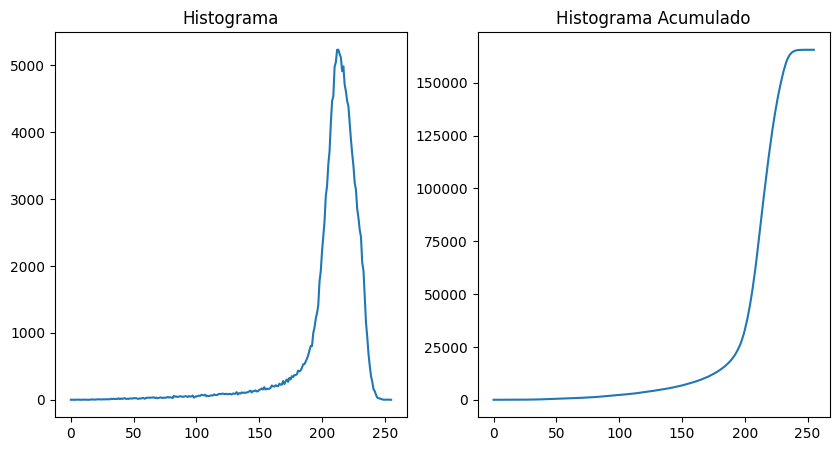

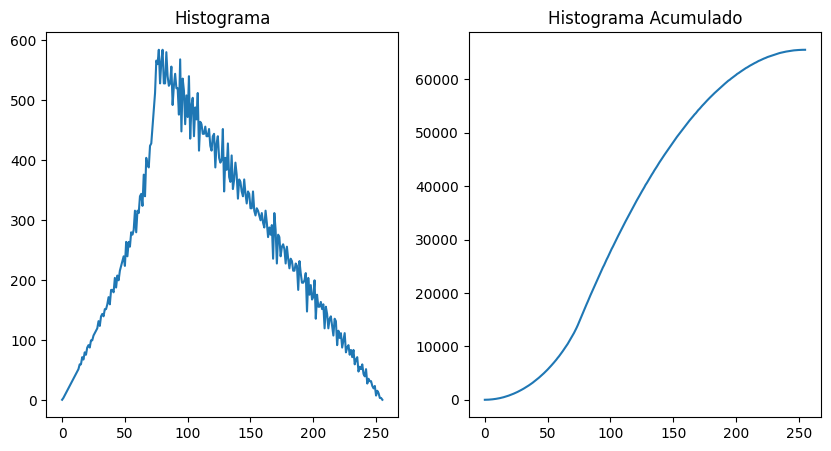

In [19]:
histogramas_con_libreria(gray_colony)
histogramas_con_libreria(gray_cone)

b) Implementar ecualización de histograma. 
- En Fiji ecualizar histograma con _Process -> Enhance Contrast_,  haciendo click en 'Equalize histogram'. Por más información referirse a [este link](https://imagej.nih.gov/ij/docs/menus/process.html#:~:text=Enhance%20Contrast,-Enhances%20image%20contrast&text=Look%20up%20%22enhancement%22%20in%20the,Increasing%20this%20value%20increases%20contrast.)

In [4]:
def ecualizarHistograma(I):
    """ https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html """
    # IMPLEMENTAR
    hist, _ = np.histogram(I.flatten(), bins=256)
    cumulative_hist = np.cumsum(hist)
    
    # enmascarar los valores 0 (los pasa a True) para evitar dividir entre 0 en la normalización
    cdf_m = np.ma.masked_equal(cumulative_hist, 0)
    # normalización entre 0 y 255
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    # se invierte la máscara, pasando los valores True a 0, y se convierte los valores a enteros
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # función de cambio de contraste
    I_ecualizada = cdf[I]

    return I_ecualizada

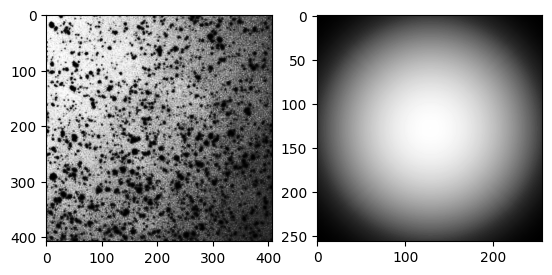

In [5]:
eq_colony = ecualizarHistograma(gray_colony)
eq_cone = ecualizarHistograma(gray_cone)
plt.subplot(121), plt.imshow(eq_colony, cmap='gray');
plt.subplot(122), plt.imshow(eq_cone, cmap='gray');

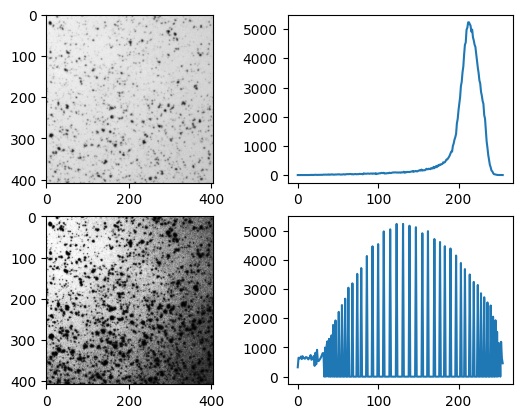

In [8]:
# chequeo con cv2
hist1 = cv2.calcHist([gray_colony],[0],None,[256],[0,256])
gray_colony_2 = cv2.equalizeHist(gray_colony)
hist2 = cv2.calcHist([gray_colony_2],[0],None,[256],[0,256])
plt.subplot(221),plt.imshow(gray_colony, cmap='gray');
plt.subplot(222),plt.plot(hist1);
plt.subplot(223),plt.imshow(gray_colony_2, cmap='gray');
plt.subplot(224),plt.plot(hist2);

c) Comparar histogramas e histogramas acumulados de la imagen original con los de la ecualizada.    
Imágenes sugeridas: celula.bmp, retina.bmp

- Para ver el histograma acumulado en Fiji, correr el macro _hist_acumulado.ijm_

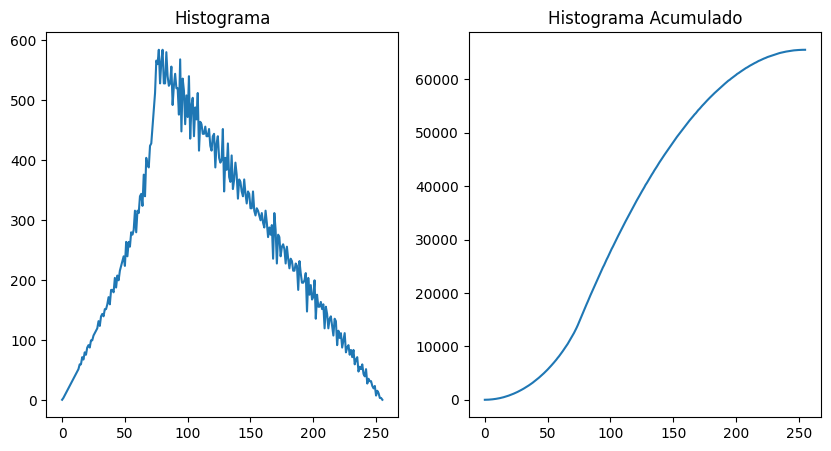

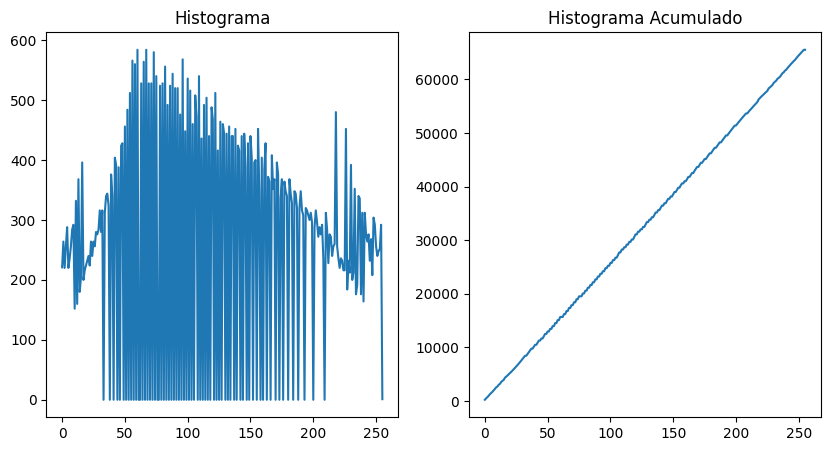

In [12]:
histograma(gray_cone); plt.show()
histograma(eq_cone); plt.show()

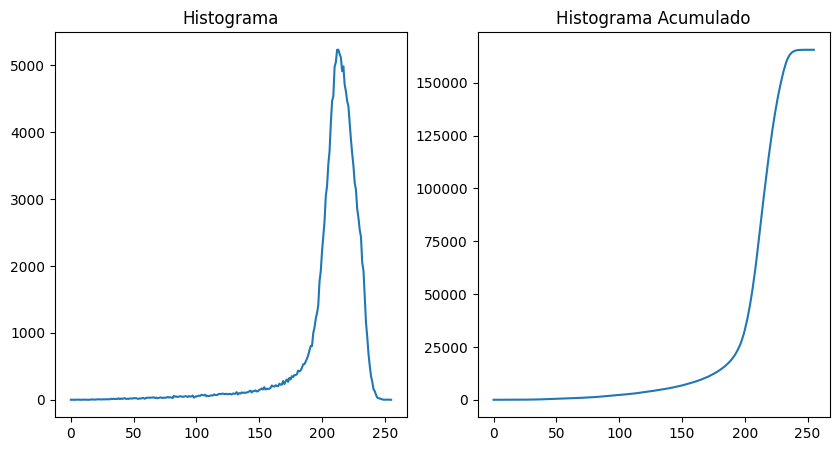

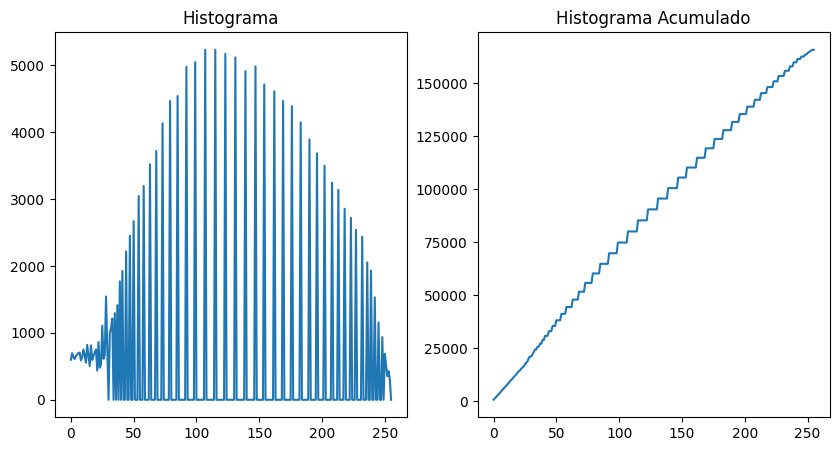

In [13]:
histograma(gray_colony); plt.show()
histograma(eq_colony); plt.show()

d) Construir una imagen formada por el conjunto de los pixels de la misma imagen pero ordenados de menor a mayor (según el nivel de gris) formando un degrade de nivel de gris. Mostrar esta imagen. Mostrar su histograma. Compararlo con el histograma de la imagen original. Ecualizar esta imagen y comparar con los resultados obtenidos sobre la imagen original.

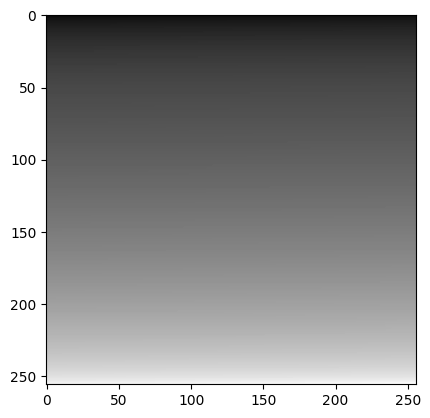

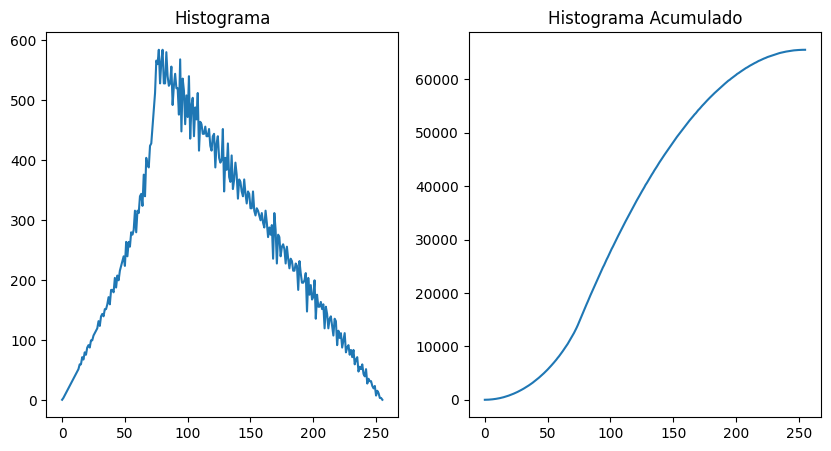

In [18]:
sorted_cone = np.sort(gray_cone, axis=None).reshape(gray_cone.shape)
plt.imshow(sorted_cone, cmap='gray')
histograma(sorted_cone) ; plt.show()

los histogramas son los mismos

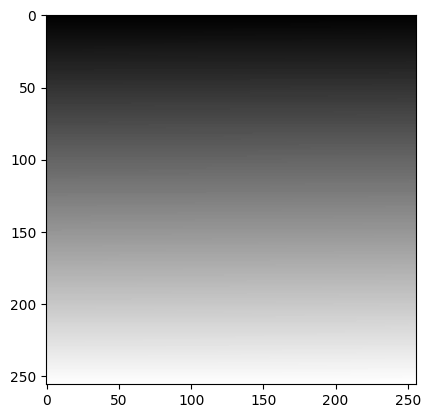

In [19]:
sorted_eq_cone = ecualizarHistograma(sorted_cone)
plt.imshow(sorted_eq_cone, cmap='gray')

e) El matching de histogramas es la transformación de una imagen para que su histograma coincida con un histograma especificado. La ecualización de histograma es un caso particular en el que el histograma especificado tiene distribución uniforme.   
Investigue cómo hacer para ajustar el histograma de una imagen al de otra imagen.  

Aplique el matching de histogramas entre dos imágenes a elección y muestre los resultados.

In [7]:
def cdf_normalizer(cumulative_hist):
    cdf_m = np.ma.masked_equal(cumulative_hist, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    return np.ma.filled(cdf_m, 0).astype('uint8')

In [8]:
def histogram_matching(I, histogram_expected):
    # Calcular el histograma de la imagen de entrada y el histograma de referencia.
    histI, _ = np.histogram(I.flatten(), 256, [0, 256])

    # Calcular las funciones de distribución acumulada (CDF) de ambos histogramas.
    chistI = cdf_normalizer(np.cumsum(histI))
    chistExpected = cdf_normalizer(np.cumsum(histogram_expected))

    # Para cada valor de intensidad de la imagen de entrada, encontrar el valor correspondiente en el histograma de referencia utilizando la CDF.
    lut = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        j = 0
        while chistI[i] > chistExpected[j]:
            j += 1
        lut[i] = j

    # Reemplazar el valor de intensidad de la imagen de entrada con el valor correspondiente del histograma de referencia.
    return cv2.LUT(I, lut)

(<Axes: >, <matplotlib.image.AxesImage at 0x7febeb211b80>)

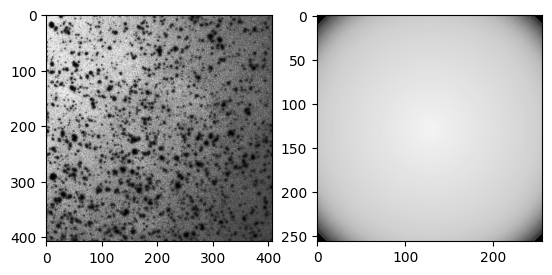

In [16]:
cone2col = histogram_matching(gray_cone, cv2.calcHist([gray_colony],[0],None,[256],[0,256]))
col2cone = histogram_matching(gray_colony, cv2.calcHist([gray_cone],[0],None,[256],[0,256]))
plt.subplot(121),plt.imshow(col2cone, cmap='gray')
plt.subplot(122),plt.imshow(cone2col, cmap='gray')

(<Axes: >, <matplotlib.image.AxesImage at 0x7ff7522fb130>)

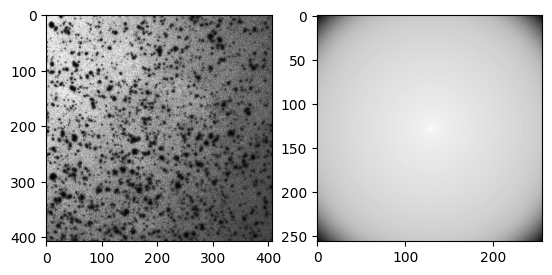

In [11]:
# con libreria
from skimage import exposure

matched_col2cone = exposure.match_histograms(gray_colony, gray_cone).astype(int)
matched_cone2col = exposure.match_histograms(gray_cone, gray_colony).astype(int)
plt.subplot(121),plt.imshow(matched_col2cone, cmap='gray')
plt.subplot(122),plt.imshow(matched_cone2col, cmap='gray')

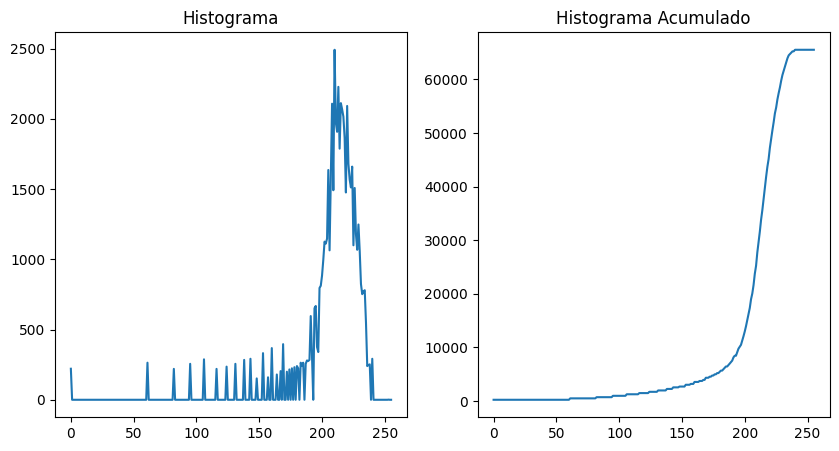

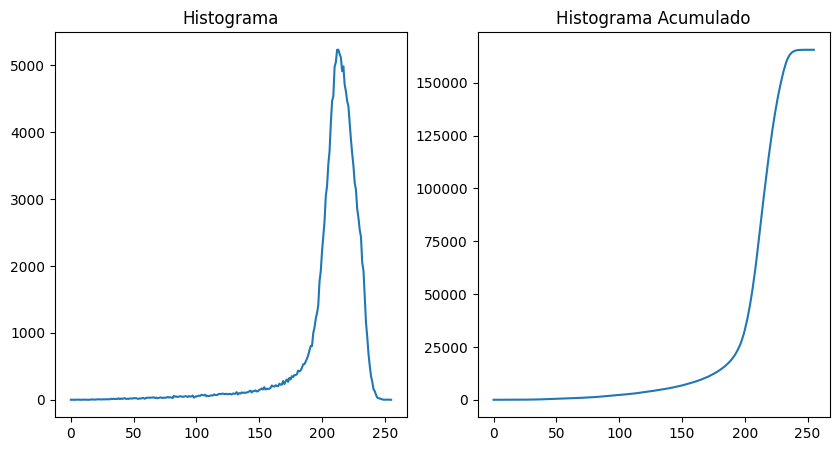

In [26]:
histograma(cone2col)
histograma(gray_colony)

## Modificación de contraste

a) Implementar una función que realice stretching, es decir, un estiramiento lineal de los valores de gris de modo que el minimo queda en 0 y el máximo en 255

In [12]:
def stretching_con_libreria(img):
    img_stretched = exposure.rescale_intensity(img)
    return img_stretched

In [13]:
def stretching(I):
    # IMPLEMENTAR
    min, max = np.min(I), np.max(I)

    I_stretched = ((I - min) / (max - min)) * 255.
    
    return I_stretched.astype('uint8')

b) Comparar las imágenes y sus respectivos histogramas antes y después de realizar el estiramiento.

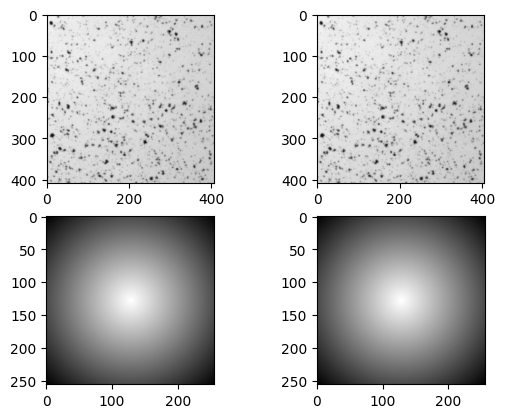

In [16]:
stretched_colony = stretching(gray_colony)
stretched_cone = stretching(gray_cone)
plt.subplot(221), plt.imshow(stretched_colony, cmap='gray');
plt.subplot(222), plt.imshow(gray_colony, cmap='gray');
plt.subplot(223), plt.imshow(stretched_cone, cmap='gray');
plt.subplot(224), plt.imshow(gray_cone, cmap='gray');

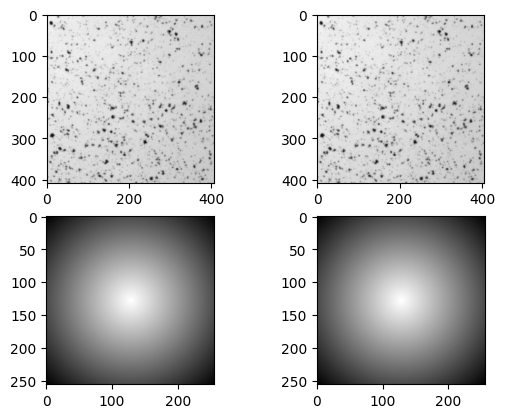

In [14]:
stretched_colony2 = stretching_con_libreria(gray_colony)
stretched_cone2 = stretching_con_libreria(gray_cone)
plt.subplot(221), plt.imshow(stretched_colony2, cmap='gray');
plt.subplot(222), plt.imshow(gray_colony, cmap='gray');
plt.subplot(223), plt.imshow(stretched_cone2, cmap='gray');
plt.subplot(224), plt.imshow(gray_cone, cmap='gray');

In [20]:
np.array_equal(stretched_colony, stretched_colony2)

True

## Procesamiento con FIJI

**Investigar más opciones de cambios de contraste usando Fiji**

+ Image -> Adjust -> Brightness/contrast)
+ Image -> Adjust -> Window/Level)

**Ver además en Fiji**

+ Image -> Lookup Tables ...
+ Analyze -> Surface Plot ...


## Opcional - Plano de bits

1. Mostrar la imagen monocromática _Cell_Colony.tif_ considerando sólo los **4 planos de bit más significativos** de la imagen, descartando los 4 menos significativos.

2. Luego, mostrar la imagen ahora considerando los **4 planos de bit menos significativos** y descartando los otros 4.

¿A qué se debe éste problema?

In [21]:
# Aplicar las máscaras
colony_4msb = np.bitwise_and(gray_colony, 240)  # 240 en binario es 11110000
colony_4lsb = np.bitwise_and(gray_colony, 15)  # 240 en binario es 00001111

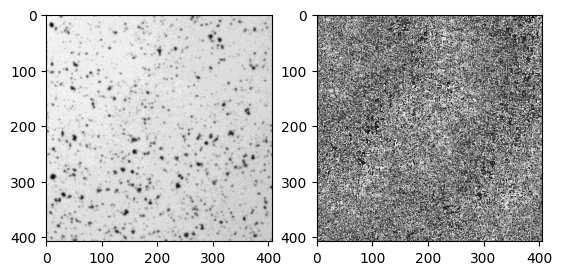

In [22]:
plt.subplot(121), plt.imshow(colony_4msb, cmap='gray');
plt.subplot(122), plt.imshow(colony_4lsb, cmap='gray');

Los 4 bits más significativos contienen información más relevante y con mayor peso en la representación de la imagen, mientras que los 4 bits menos significativos contienen información menos relevante y con menor peso. Esto se debe a que el valor de cada bit representa una potencia de dos, por lo que los bits más significativos tienen un peso mayor.

Por lo tanto, si se analizan solo los 4 bits más significativos, se está considerando la información más importante de la imagen y se descarta información menos relevante. Mientras que si se analizan solo los 4 bits menos significativos, se está considerando información menos relevante y se descarta información más importante.